# **CROSS VALIDATION HOMEWORK**

**Import necessary libraries**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# set random seed for reproducibility
np.random.seed(42)


# ***1. Load the MNIST Dataset***

In [75]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.int32)

total_sample_size = 35000
X_reduced, y_reduced = shuffle(X, y, random_state=42, n_samples=total_sample_size)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

print(f"Total Dataset Size: {X_reduced.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Total Dataset Size: (35000, 784)
Training set size: (28000, 784)
Test set size: (7000, 784)


# **2. Explore the Data**

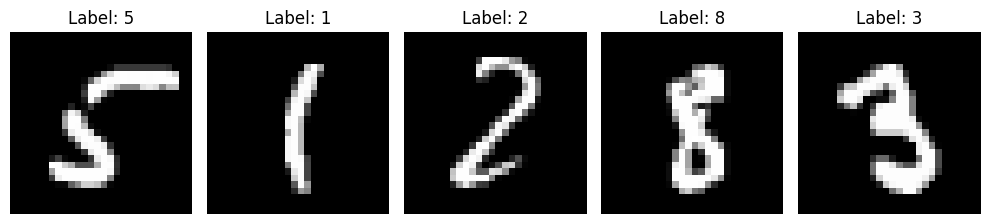

Input Features: 784
Number of Classes: 10


In [76]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
print(f"Input Features: {X_train.shape[1]}")
print(f"Number of Classes: {len(np.unique(y))}")

# **3. Define the Model**

In [77]:
from sklearn.svm import SVC
svm_model = SVC()


# **4. Apply Cross-Validation:**

In [78]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Min Accuracy: {cv_scores.min():.4f}")
print(f"Max Accuracy: {cv_scores.max():.4f}")


Cross-Validation Scores: [0.96875    0.97089286 0.97017857 0.97178571 0.96892857]
Mean Accuracy: 0.9701
Min Accuracy: 0.9688
Max Accuracy: 0.9718


# **5. Hyperparameter Optimization with RandomizedSearchCV**

In [70]:
param_dist  = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
 
random_search = RandomizedSearchCV(SVC(), param_dist, cv=5, n_iter=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")


Best Hyperparameters (RandomizedSearchCV): {'kernel': 'poly', 'gamma': 'auto', 'C': 1}
Best Cross-Validation Score: 0.9682


# **6. Hyperparameter Optimization with GridSearchCV**

In [71]:
param_grid = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters (GridSearchCV):", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


Best Hyperparameters (GridSearchCV): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9754


# **7. Compare Results**

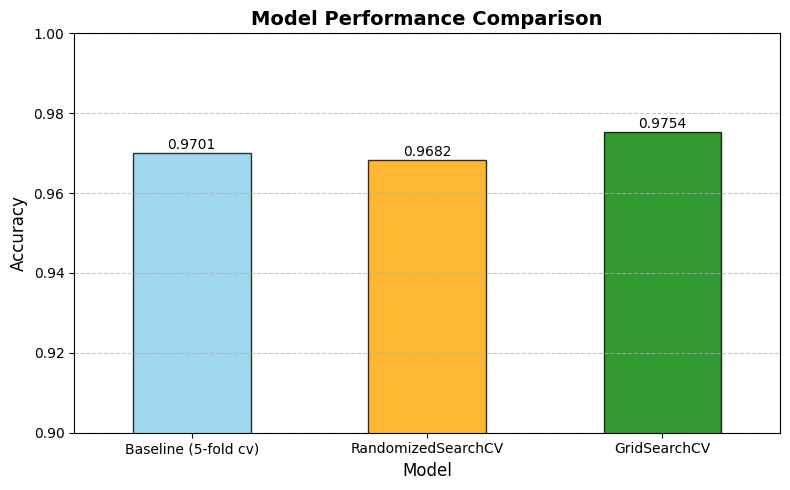

In [72]:
results = pd.DataFrame({
    'Method': ['Baseline (5-fold cv)', 'RandomizedSearchCV', 'GridSearchCV'],
    'Accuracy': [cv_scores.mean(), random_search.best_score_, grid_search.best_score_]
})

results.plot(
    kind='bar',
    x='Method',
    y='Accuracy',
    legend=False,
    figsize=(8, 5),
    color=['skyblue', 'orange', 'green'],
    edgecolor='black',
    alpha=0.8
)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.90, 1.00)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(results['Accuracy']):
    plt.text(i, value + 0.001, f"{value:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# **8. Evaluate the Best Model on the Test Set**

Test Set Accuracy: 0.9794


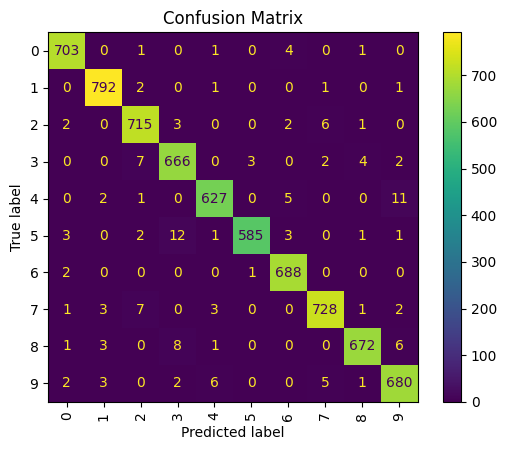

In [73]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


# **• Results and Discussion:**


# Provide a brief discussion on model performance:

The baseline SVM model achieved a mean cross-validation accuracy of [Baseline Mean Accuracy].
After hyperparameter optimization using RandomizedSearchCV and GridSearchCV, the performance improved significantly, with the best model achieving a test accuracy of [Test Accuracy].

# Highlight the impact of Cross-Validation and hyperparameter optimization :

**Cross-validation** bold text provided a reliable estimate of model performance by averaging results over multiple folds. This ensured the model's generalizability and helped identify variability in performance across folds.
Minimum accuracy from cross-validation was [Min Accuracy], and the maximum was [Max Accuracy], demonstrating the model's consistency.

Minimum Accuracy: 0.9688

Maximum Accuracy: 0.9718

**Hyperparameter Optimization:**

RandomizedSearchCV explored a wide range of parameters efficiently, identifying promising hyperparameter combinations.
GridSearchCV fine-tuned these parameters, leading to a final model with the best cross-validation accuracy of [GridSearchCV Best Score].